<a href="https://colab.research.google.com/github/Bhandari007/convolutional_neural_network/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation

Having a high training accuracy does not automatically mean having a good predictive model. It can still perform poorly on new data because it has overfit to the training set. In this notebook, we will se how to avoid that using, *data augmentation*. This increases the amount of training data by modifying the existing training data's properties. For example, in image data, we can apply different preprocessing techniques such as rotate, flip, shear or zoom on our existing images so we can simulate other data that the model should also learn from. This way, the model would see more variety in the images training so it woll infer better on new, previously unseen data.


# Baseline Peformance

We will start with a model that's very effective at learning `Cats vs Dogs` without data augmentation. It's similar to the previous models that we have used.

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2022-10-19 04:44:19--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   314MB/s    in 0.2s    

2022-10-19 04:44:20 (314 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Constant for epochs
EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 18s - loss: 0.6904 - accuracy: 0.5250 - val_loss: 0.6682 - val_accuracy: 0.6500 - 18s/epoch - 184ms/step
Epoch 2/20
100/100 - 9s - loss: 0.6518 - accuracy: 0.6165 - val_loss: 0.6649 - val_accuracy: 0.5710 - 9s/epoch - 89ms/step
Epoch 3/20
100/100 - 9s - loss: 0.6002 - accuracy: 0.6725 - val_loss: 0.5875 - val_accuracy: 0.7030 - 9s/epoch - 88ms/step
Epoch 4/20
100/100 - 9s - loss: 0.5569 - accuracy: 0.7135 - val_loss: 0.5827 - val_accuracy: 0.7060 - 9s/epoch - 89ms/step
Epoch 5/20
100/100 - 9s - loss: 0.5140 - accuracy: 0.7490 - val_loss: 0.5652 - val_accuracy: 0.7050 - 9s/epoch - 89ms/step
Epoch 6/20
100/100 - 10s - loss: 0.4863 - accuracy: 0.7690 - val_loss: 0.5892 - val_accuracy: 0.6770 - 10s/epoch - 99ms/step
Epoch 7/20
100/100 - 9s - loss: 0.4592 - accuracy: 0.7835 - val_loss: 0.5456 - val_accuracy: 0.7330 - 9s/epoch - 90ms/step
Epoch 8/20
100/100 - 9s - loss: 0.4332 - accuracy: 0.8005 - val_loss: 0.5487 - val_accuracy: 0.7380 - 9s/epoch - 89ms/step
Epoch 9/20


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()



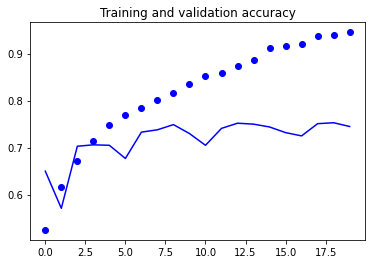

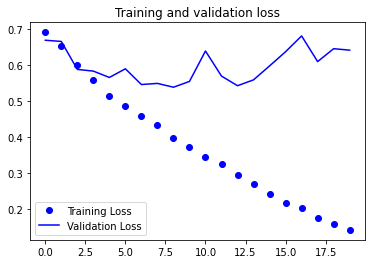

In [ ]:
# Plot training results
plot_loss_acc(history)

From the results above, we see that the training accuracy is more than 90%, and the validation accuracy is in the 70-80% range. This is called overfitting.

# Data augmentation

One simple method to avoid overfitting is to augment the images a bit.

In [ ]:
# Create a new model
model_for_aug = create_model()

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range= 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"

)

# Train the new model
history_with_aug  = model_for_aug.fit(
    train_generator,
    steps_per_epoch =100,
    epochs = EPOCHS,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 18s - loss: 0.6943 - accuracy: 0.5085 - val_loss: 0.6846 - val_accuracy: 0.6030 - 18s/epoch - 184ms/step
Epoch 2/20
100/100 - 17s - loss: 0.6806 - accuracy: 0.5690 - val_loss: 0.6717 - val_accuracy: 0.5750 - 17s/epoch - 174ms/step
Epoch 3/20
100/100 - 17s - loss: 0.6686 - accuracy: 0.5990 - val_loss: 0.6338 - val_accuracy: 0.6410 - 17s/epoch - 174ms/step
Epoch 4/20
100/100 - 18s - loss: 0.6565 - accuracy: 0.6135 - val_loss: 0.6192 - val_accuracy: 0.6620 - 18s/epoch - 184ms/step
Epoch 5/20
100/100 - 18s - loss: 0.6444 - accuracy: 0.6315 - val_loss: 0.6079 - val_accuracy: 0.6830 - 18s/epoch - 179ms/step
Epoch 6/20
100/100 - 17s - loss: 0.6265 - accuracy: 0.6425 - val_loss: 0.5996 - val_accuracy: 0.6690 - 17s/epoch - 173ms/step
Epoch 7/20
100/100 - 20s - loss: 0.6208 - accuracy: 0.6625 - val_loss: 0.5793 - val_accuracy: 0.6910 - 20s/epoch - 198ms/step
Epoch 8/20
100/100 - 17s - loss: 0

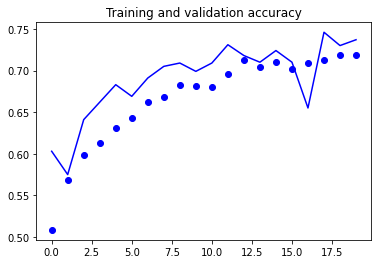

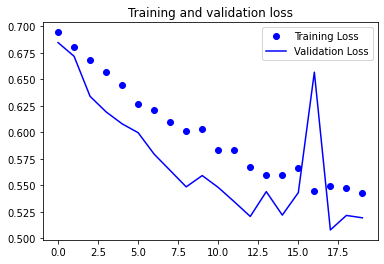

In [ ]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)